### PREDICTING LIFE EXPECTANCY USING MACHINE LEARNING :

### IMPORTED THE LIBRARIES :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### IMPORTED THE DATASET (CSV FILE) :

In [2]:
def __iter__(self): return 0
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bf71b2aaab5e4141bd379fd5c105495e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JcOuC3TjF2N-Pi5woz9LxySmMZQbOUtpwqebZu9meLoS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_bf71b2aaab5e4141bd379fd5c105495e.get_object(Bucket='lifeexpectancy1-donotdelete-pr-9mkzixoybncfxs',Key='LifeExpectancyData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
LifeData = pd.read_csv(body)
LifeData.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
LifeData.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
LifeData.columns


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
LifeData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

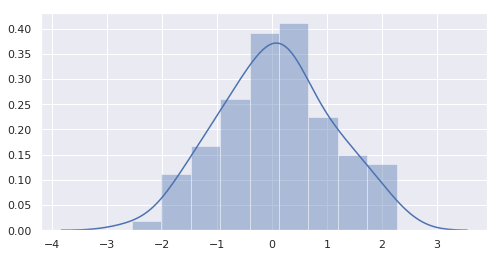

In [5]:
sns.set(rc={"figure.figsize": (8, 4)}); np.random.seed(0)
x = np.random.randn(100)
ax = sns.distplot(x)
plt.show()

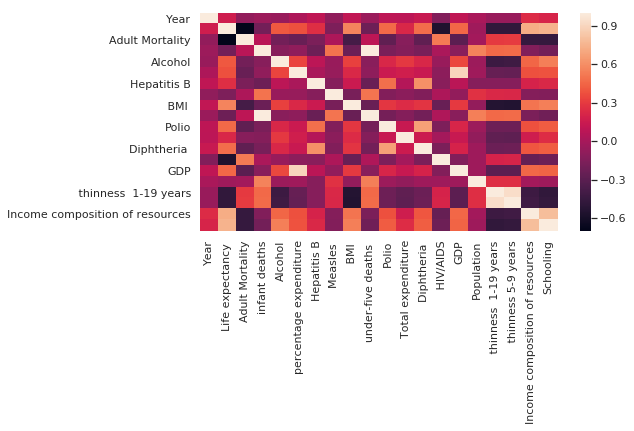

In [6]:
sns.heatmap(LifeData.corr())

In [7]:
LifeData=LifeData.drop("Year",axis=1)

In [8]:
LifeData["status"] = pd.get_dummies(LifeData["Status"], drop_first = True)


In [9]:
print(LifeData["status"])

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2908    1
2909    1
2910    1
2911    1
2912    1
2913    1
2914    1
2915    1
2916    1
2917    1
2918    1
2919    1
2920    1
2921    1
2922    1
2923    1
2924    1
2925    1
2926    1
2927    1
2928    1
2929    1
2930    1
2931    1
2932    1
2933    1
2934    1
2935    1
2936    1
2937    1
Name: status, Length: 2938, dtype: uint8


In [10]:
LifeData = LifeData.groupby('Country').mean()

In [11]:
LifeLabels = LifeData['Life expectancy ']
LifeFeatures = LifeData.drop('Life expectancy ', axis = 1)


In [12]:
LifeFeatures.isnull().head()
LifeFeatures.isnull().sum()
LifeLabels.isnull().sum()
LifeFeatures.fillna(value = LifeFeatures.mean(), inplace = True)
LifeLabels.fillna(value = LifeLabels.mean(), inplace = True)


In [13]:
from scipy import stats
stats.describe(LifeFeatures[1:])

DescribeResult(nobs=192, minmax=(array([1.87500000e+01, 0.00000000e+00, 1.00000000e-02, 0.00000000e+00,
       8.00000000e+00, 0.00000000e+00, 5.20000000e+00, 0.00000000e+00,
       9.00000000e+00, 1.64666667e+00, 9.00000000e+00, 1.00000000e-01,
       1.36183210e+02, 2.92000000e+02, 1.00000000e-01, 1.00000000e-01,
       1.31687500e-01, 0.00000000e+00, 0.00000000e+00]), array([5.50062500e+02, 1.36668750e+03, 1.34973333e+01, 9.80181038e+03,
       9.90000000e+01, 6.58579375e+04, 8.73000000e+01, 1.81250000e+03,
       9.90000000e+01, 1.72400000e+01, 9.90000000e+01, 3.29437500e+01,
       5.73628746e+04, 4.21467691e+08, 2.71000000e+01, 2.79437500e+01,
       9.31437500e-01, 2.00375000e+01, 1.00000000e+00])), mean=array([1.64253396e+02, 2.85745443e+01, 4.46296480e+00, 7.12321318e+02,
       7.85909681e+01, 2.30174674e+03, 3.96797168e+01, 3.96419271e+01,
       8.26078218e+01, 6.01668050e+00, 8.23842541e+01, 1.67047526e+00,
       7.25930328e+03, 1.25835883e+07, 4.62089964e+00, 4.65416339e

In [14]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
LifeFeatures = min_max_scaler.fit_transform(LifeFeatures)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [15]:
LifeFeatures

array([[4.71121045e-01, 5.72552248e-02, 3.24378429e-04, ...,
        3.54720225e-01, 4.09856519e-01, 1.00000000e+00],
       [4.95235855e-02, 5.03041112e-04, 3.58762543e-01, ...,
        7.22960300e-01, 6.05739239e-01, 1.00000000e+00],
       [1.68333137e-01, 1.48625783e-02, 2.94103109e-02, ...,
        7.04204439e-01, 6.34435434e-01, 1.00000000e+00],
       ...,
       [3.63369015e-01, 2.88105364e-02, 2.76802926e-03, ...,
        4.29899969e-01, 4.24516532e-01, 1.00000000e+00],
       [6.31572756e-01, 2.44660905e-02, 1.65290890e-01, ...,
        4.58580807e-01, 5.59575795e-01, 1.00000000e+00],
       [8.34960593e-01, 1.94356793e-02, 3.31570362e-01, ...,
        3.84417005e-01, 4.90330630e-01, 1.00000000e+00]])

### SPLITED  INTO TRAIN,TEST DATA :

In [16]:
from sklearn.model_selection import train_test_split
LifeFeatures_train, LifeFeatures_test, LifeLabels_train, LifeLabels_test = train_test_split(
        LifeFeatures, LifeLabels, train_size = 0.7, test_size = 0.3)

### RANDOM FOREST REGRESSOR :

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
random_forest_model = RandomForestRegressor()
random_forest_fit = random_forest_model.fit(LifeFeatures_train, LifeLabels_train)

random_forest_score = cross_val_score(random_forest_fit, LifeFeatures_train, LifeLabels_train, cv = 5)
print("mean cross validation score: %.2f"
       % np.mean(random_forest_score))
print("score without cv: %.2f"
      % random_forest_fit.score(LifeFeatures_train, LifeLabels_train))
print("R^2 score on the test data %.2f"
      %r2_score(LifeLabels_test, random_forest_fit.predict(LifeFeatures_test)))


mean cross validation score: 0.87
score without cv: 0.98
R^2 score on the test data 0.93


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
random_forest_model_predict = random_forest_model.predict(LifeFeatures_test)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
scoring = make_scorer(r2_score)
grid_cv = GridSearchCV(RandomForestRegressor(),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)
grid_cv.fit(LifeFeatures_train, LifeLabels_train)
grid_cv.best_params_

result = grid_cv.cv_results_
print("Best Parameters: " + str(grid_cv.best_params_))
result = grid_cv.cv_results_
print("R^2 score on training data: %.2f"  % grid_cv.best_estimator_.score(LifeFeatures_train, LifeLabels_train))
print("R^2 score: %.2f"
      % r2_score(LifeLabels_test, grid_cv.best_estimator_.predict(LifeFeatures_test)))
print("Mean squared error: %.2f"
      % mean_squared_error(LifeLabels_test, random_forest_model_predict))
print("Mean absolute error: %.2f"
      % mean_absolute_error(LifeLabels_test, random_forest_model_predict))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/envs/Python36/lib/python3

Best Parameters: {'min_samples_split': 7}
R^2 score on training data: 0.97
R^2 score: 0.93
Mean squared error: 6.05
Mean absolute error: 1.66


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [20]:
random_forest_model.score(LifeFeatures,LifeLabels)

0.9639183356813295

In [21]:
y=random_forest_model.predict(LifeFeatures_test)

In [22]:
df=pd.DataFrame({'Actual':LifeLabels_test, 'Predicted':y})

In [23]:
df1=df.head(25)

### COMPARED THE ACTUAL & PREDICTED  VALUE :

In [24]:
print(df1)

                                          Actual  Predicted
Country                                                    
Russian Federation                     67.762500  67.605625
Serbia                                 73.956250  73.647500
Brunei Darussalam                      76.487500  76.815000
France                                 82.218750  81.401250
Madagascar                             62.743750  62.304375
Samoa                                  73.618750  70.932493
Congo                                  59.043750  56.128750
Somalia                                53.318750  64.806250
Hungary                                73.825000  73.468125
Haiti                                  59.868750  62.683125
Malawi                                 49.893750  52.215000
Democratic People's Republic of Korea  69.193750  71.531868
Cook Islands                           69.224932  70.181209
Lesotho                                48.781250  54.352500
Micronesia (Federated States of)       6

### FOR DIAGRAMATIC VIEW :

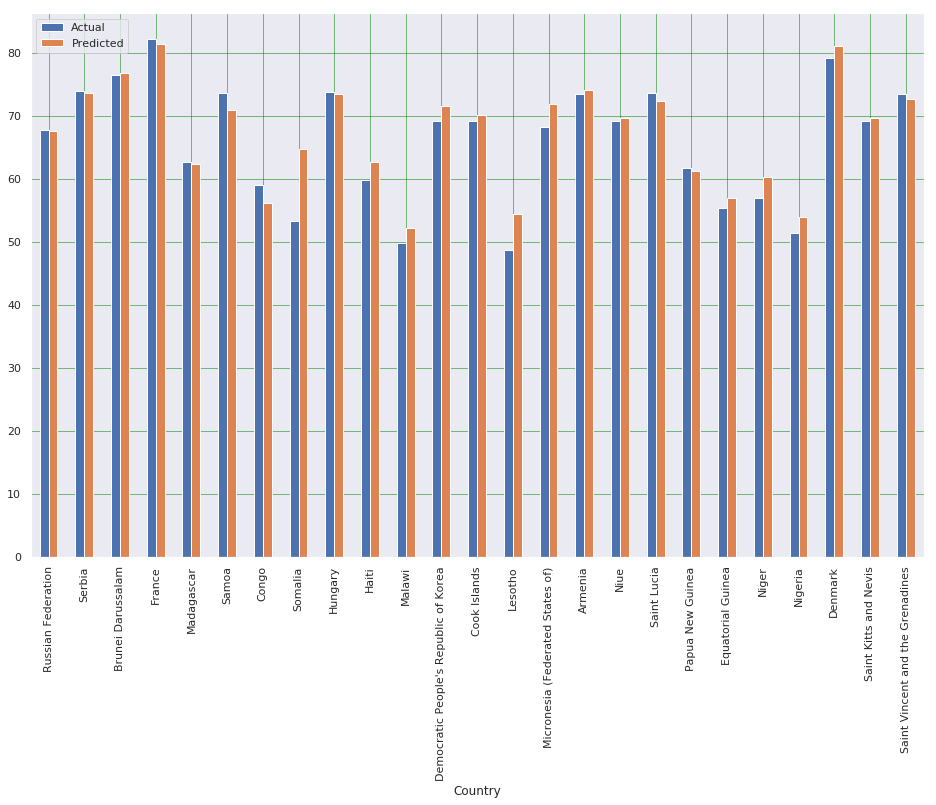

In [25]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

### PREDICTION :

In [26]:
x=pd.DataFrame({'Status':[1],'Adult Mortality':[138], 'infant deaths':[1], 'Alcohol':[12.03],
       'percentage expenditure':[153.14], 'Hepatitis B':[95], 'Measles ':[0], ' BMI ':[65.1],
       'under-five deaths ':[1], 'Polio':[88], 'Total expenditure':[8.44], 'Diphtheria ':[88],
       ' HIV/AIDS':[0.1], 'GDP':[7853.335], 'Population':[7223938], ' thinness  1-19 years':[1.9],
       ' thinness 5-9 years':[1.9], 'Income composition of resources':[0.787], 'Schooling':[14.8]})
prediction=random_forest_model.predict(x)
print(prediction)


[52.64625]


### IMPORT WATSON MACHINE LEARNING API CLIENT :

In [38]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [28]:
wml_credentials={
  "apikey": "FRwbQVncx3aSIFziWj95nxIHhLRpZPPzMYGlVNXQAdzh",
  "iam_apikey_description": "Auto-generated for key a095b599-53f4-42bd-bcb8-15b2507a461a",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/b1cd8a4ac5f749a8862c4bb1e3013645::serviceid:ServiceId-ef85c154-2dd5-482d-8bc2-1d764e7c6926",
  "instance_id": "42c7c1be-8e3e-4a87-9cad-79d7998a65fb",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [29]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [30]:
model_props={
    client.repository.ModelMetaNames.AUTHOR_NAME:'kishore',
    client.repository.ModelMetaNames.AUTHOR_EMAIL:'srikishoreraju@gmail.com',
    client.repository.ModelMetaNames.NAME:"Life-Expectancy",
    
}

In [33]:
model_artifact =client.repository.store_model(random_forest_fit, meta_props=model_props)
published_model_uid=client.repository.get_model_uid(model_artifact)
published_model_uid

'a6e467e4-50dc-45f4-b32f-1c3dcf9390f9'

### DEPLOYMENT :

In [34]:
deployment=client.deployments.create(published_model_uid,name="Life-Expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'a6e467e4-50dc-45f4-b32f-1c3dcf9390f9' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='148227d1-d4d4-4870-a31d-141a564dd51b'
------------------------------------------------------------------------------------------------




In [35]:
client.deployments.list()

------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME             TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
148227d1-d4d4-4870-a31d-141a564dd51b  Life-Expectancy  online  DEPLOY_SUCCESS  2020-06-08T11:24:13.076Z  scikit-learn-0.20  model
75678bb6-a8d2-4a57-9af6-3851058b73ba  Life-Expectancy  online  DEPLOY_SUCCESS  2020-06-06T16:23:29.058Z  scikit-learn-0.20  model
------------------------------------  ---------------  ------  --------------  ------------------------  -----------------  -------------


In [36]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)

### ENDPOINT URL :

In [37]:
scoring_endpoint


'https://us-south.ml.cloud.ibm.com/v3/wml_instances/42c7c1be-8e3e-4a87-9cad-79d7998a65fb/deployments/148227d1-d4d4-4870-a31d-141a564dd51b/online'